---------------------------
## Problem Statement - 

#### Daimler challenge - reduce the time that cars spend on the test bench. 
-----------------------------------

- The objective of the Mercedes-Benz Greener Manufacturing competition is to develop a machine learning model that can 

    - accurately `predict the time a car will spend on the test bench` based on the vehicle configuration. 

    - `reduce the total time spent testing vehicles by allowing cars with similar testing configurations to be run successively. 

- The `vehicle configuration` is defined as the set of customization options and features selected for the particular vehicle. 

- This problem is an example of a machine learning `regression` task because it requires predicting a continuous target variable (the duration of the test) based on one or more explanatory variables (the configuration of the vehicle). 

- This problem is also a supervised task because the targets for the training data are known ahead of time and the model will learn based on labeled data.

    2. Prepare the data to feed into the machine learning model.

    3. Select an appropriate algorithm/method for the problem.

    4. Optimize the model using the labeled training data.


#### About the dataset

- contains an anonymized set of variables, each representing a custom feature in a Mercedes car. 
    - For example, a variable could be 4WD, added air suspension, or a head-up display.

- The ground truth is labeled $y$ and represents the `time` (in `seconds`) that the car took to pass testing for each variable.

- Variables with letters are `categorical`. 

- Variables with 0/1 are `binary` values.

- train.csv - the training set
- test.csv - the test set, 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [3]:
location_train = r"D:\AI-DATASETS\01-MISC\merc-train.csv"

In [4]:
df_train = pd.read_csv(location_train)

print("training dataset -  rows:", df_train.shape[0]," columns:", df_train.shape[1])

training dataset -  rows: 4209  columns: 378


In [6]:
df_train[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']].sample(10)

,X0,X1,X2,X3,X4,X5,X6,X8
3986,w,s,as,c,d,w,g,r
3006,y,a,f,f,d,q,l,l
3284,x,v,e,c,d,s,g,s
414,z,aa,f,g,d,d,l,o
3856,o,v,as,f,d,w,j,a
3075,j,aa,as,c,d,q,g,r
3977,ak,l,as,c,d,w,j,q
3750,ay,i,as,a,d,v,l,k
3227,y,b,r,a,d,s,g,b
1506,t,r,ae,c,d,ad,j,b


> The columns X0, X1... , X8 are categorical

In [7]:
df_train[df_train.columns[10:]].sample(10)

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3226,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3244,0,0,1,0,0,0,0,0,0,0

- X10, X11 ... X385 are numerical (binary) - presence/absence of a car feature

- Assess the unique values in the columns [X10, X11....X385]

In [7]:
np.unique(df_train[df_train.columns[10:]])

array([0, 1], dtype=int64)

#### type of columns
let us have a look at the data type of all the variables present in the dataset.

In [8]:
dtype_df = df_train.dtypes.reset_index()
dtype_df.sample(10)

,index,0
198,X204,int64
344,X351,int64
100,X102,int64
241,X247,int64
359,X366,int64
221,X227,int64
302,X309,int64
82,X84,int64
369,X376,int64
210,X216,int64


In [9]:
dtype_df.columns = ["Count", "Column Type"]
dtype_df.head(3)

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object


In [10]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


#### analyze the columns types - train

In [8]:
# possible data types in pandas
numerics= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']   # numeric
objects = ['O']     

In [9]:
df_train_num = df_train.select_dtypes(include=numerics)
df_train_cat = df_train.select_dtypes(include=objects)

In [10]:
print(df_train_cat.columns)
print(df_train_num.columns)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


#### Looking into each categorical feature - train

In [12]:
# for each cat column, display the distinct values
for col_name in df_train_cat.columns:
    
    print('The unique values in '+col_name+' are: ', df_train_cat[col_name].nunique())
    
    print(df_train_cat[col_name].unique())

The unique values in X0 are:  47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
The unique values in X1 are:  27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
The unique values in X2 are:  44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
The unique values in X3 are:  7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
The unique values in X4 are:  4
['d' 'b' 'c' 'a']
The unique values in X5 are:  29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
The unique values in X6 are:  12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
The unique values 

#### Analyze the $y $ - testing time, for each of cat columns
- to assess the usefulness of the cat columns
    - we shall use boxplot

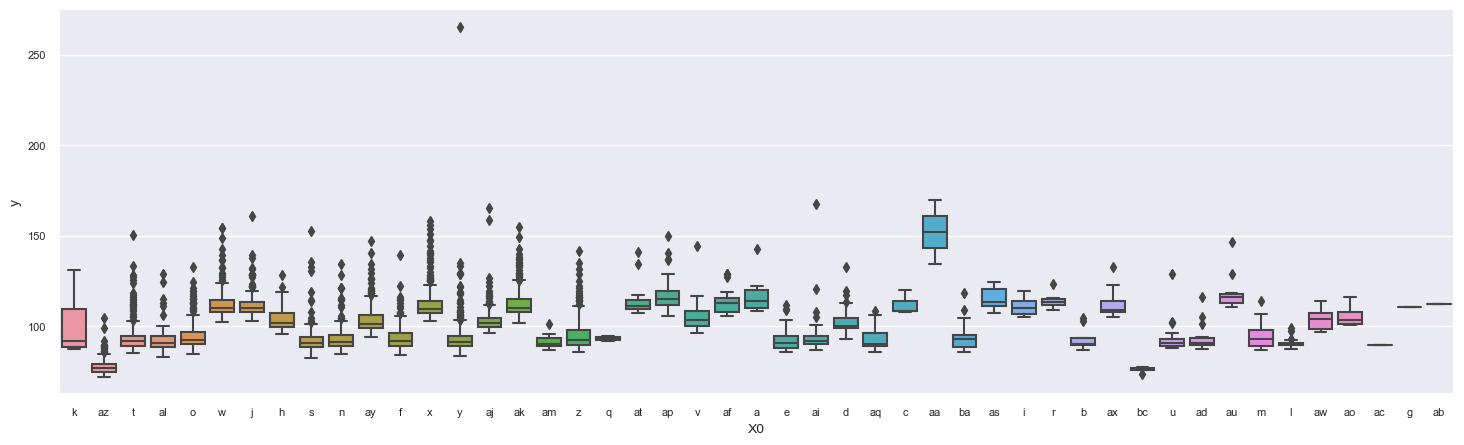

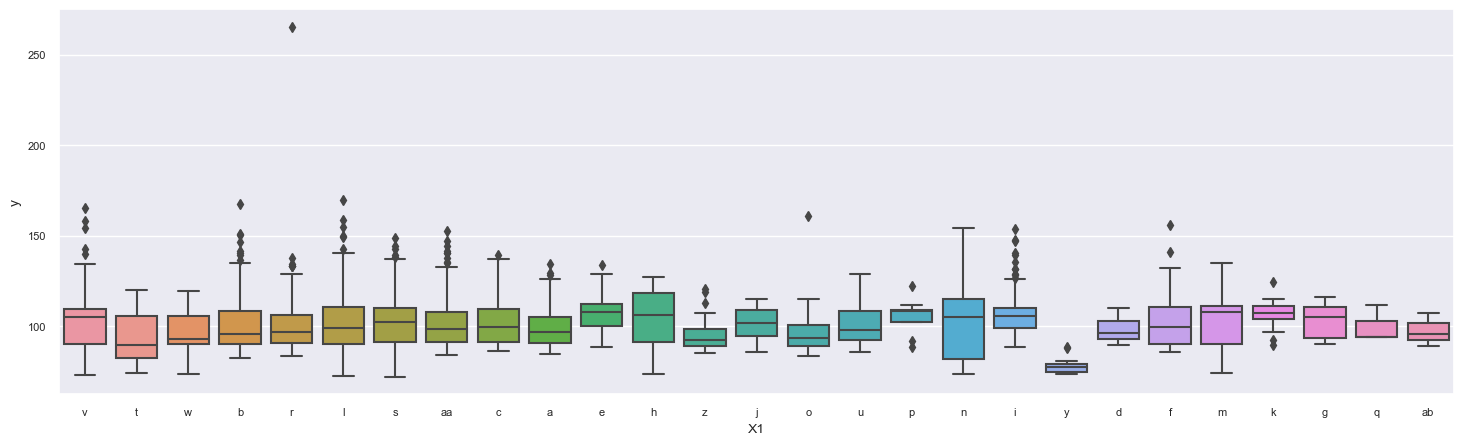

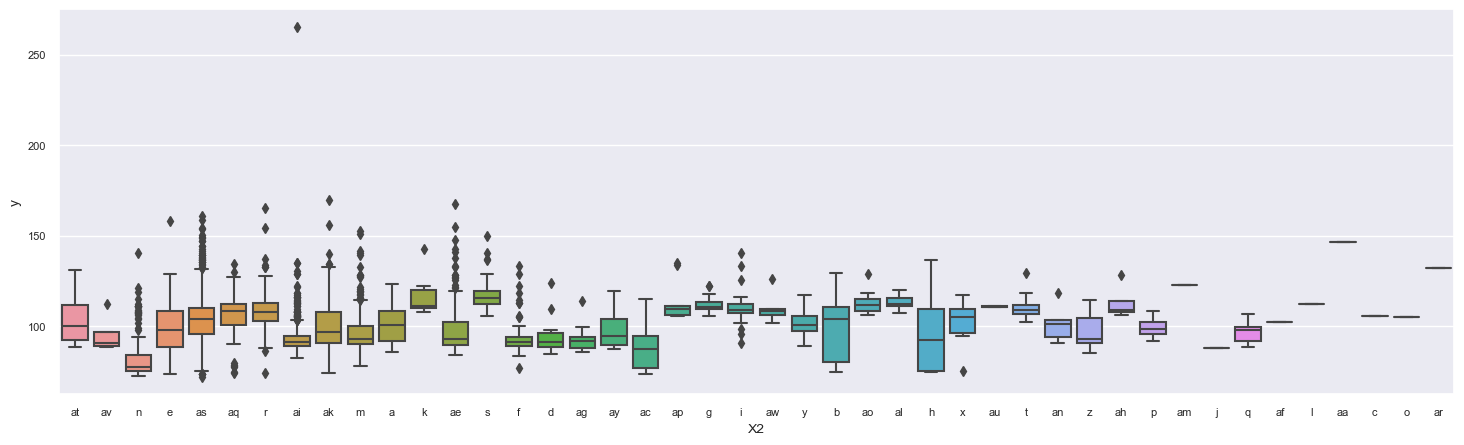

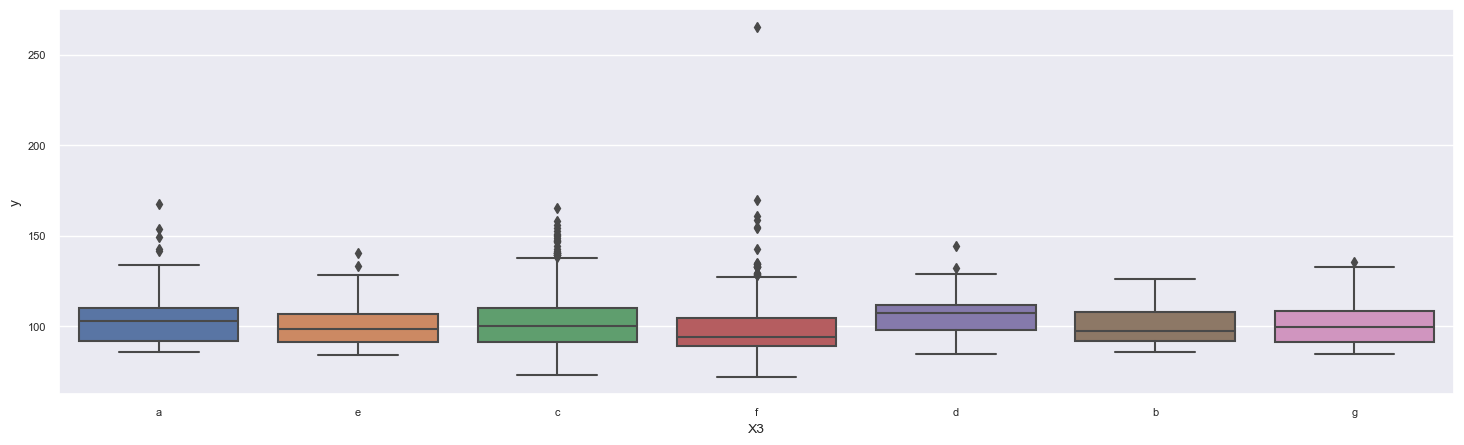

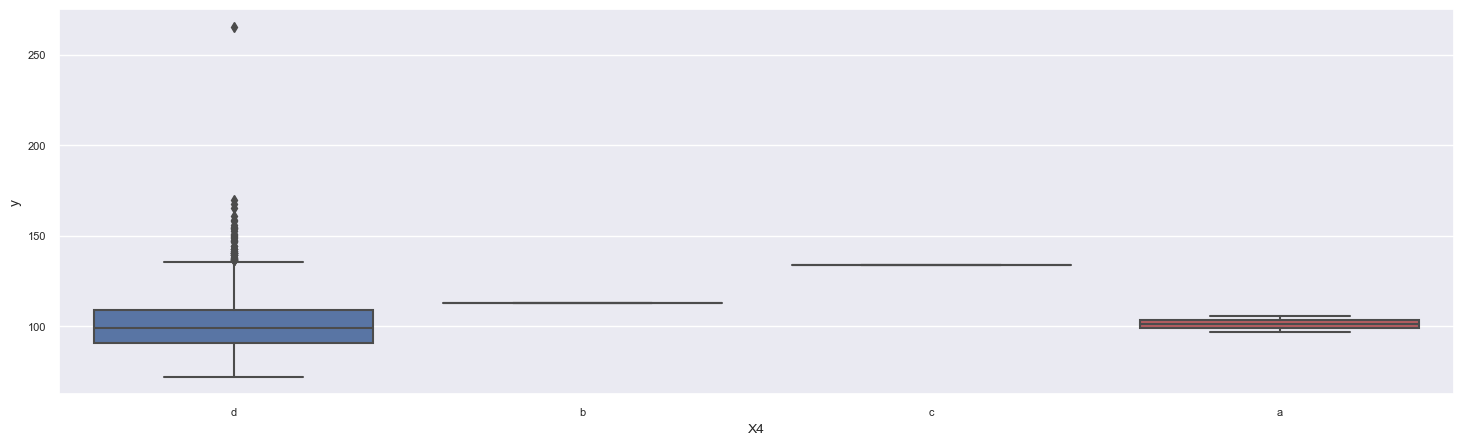

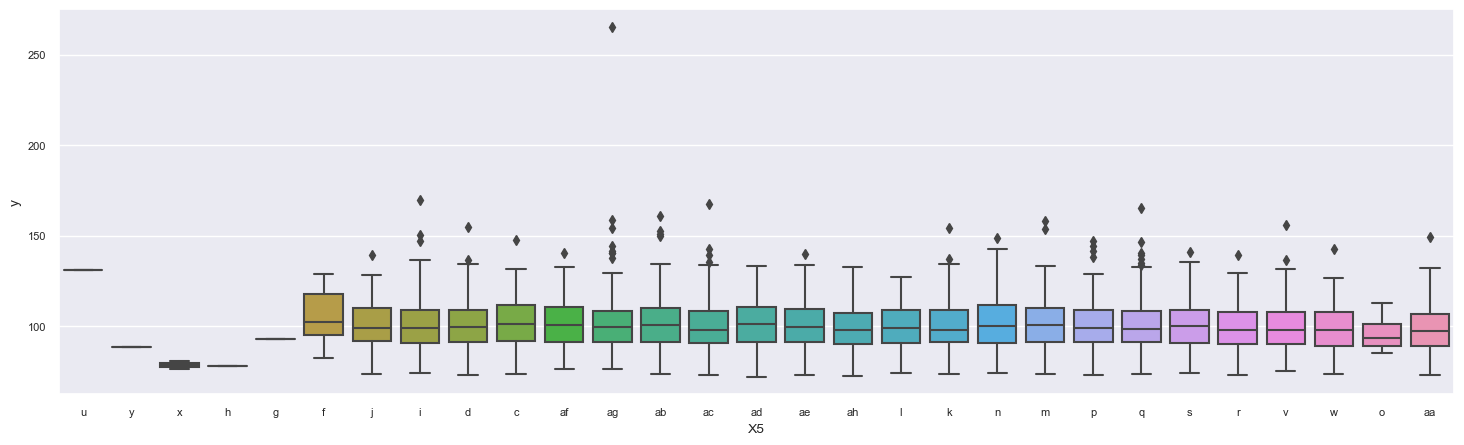

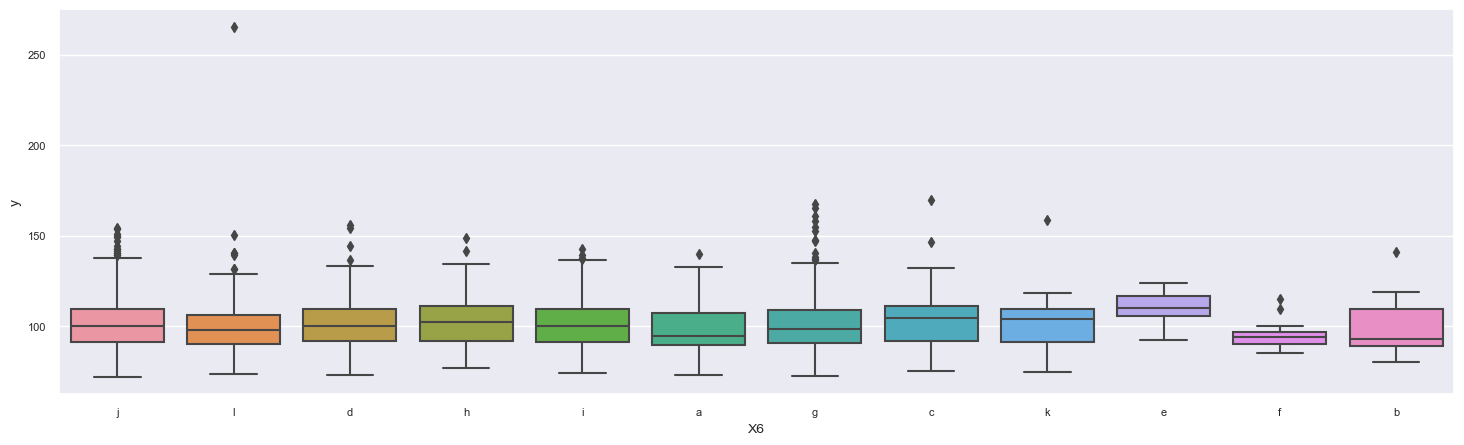

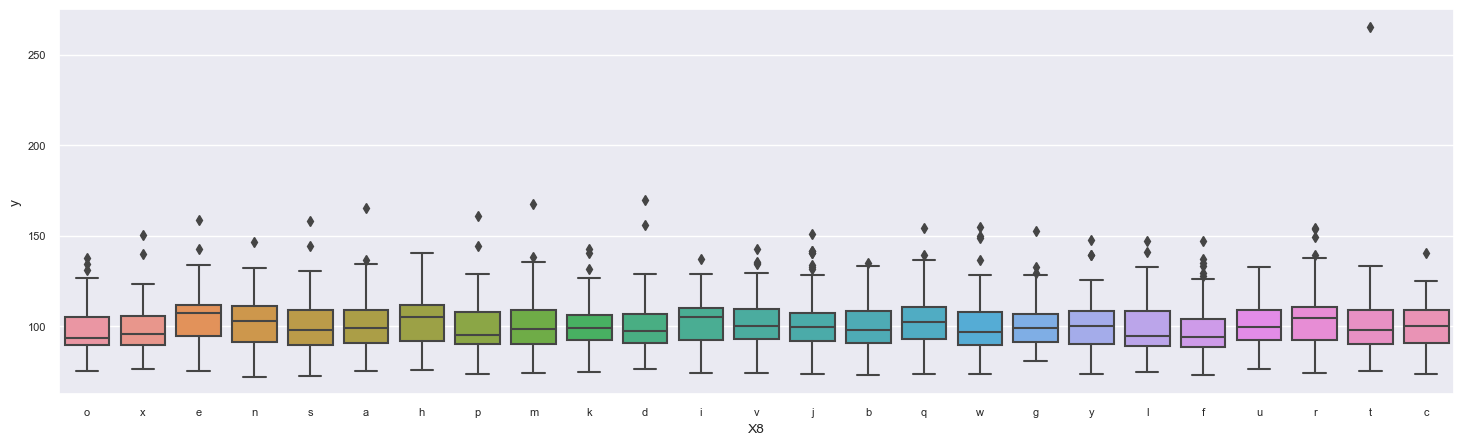

In [13]:
# value of y change for each of X0, X1...
cols=['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cols:
    plt.figure(figsize=(18, 5))
    
    sns.boxplot(x=col, y='y', data=df_train)
    
    plt.xlabel(col, fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

#### Observation

| Column name | Is this col useful? |
|------------| --------------------- |
| X0 | Y|
| X1 | Y|
| X2 | Y|
| X3 | Y|
| X4 | N|
| X6 | Y|
| X8 | Y|

- but we need to perform some hypothesis testing to further assess

#### Use of hypothesis testing (ANOVA) 
- check if the categorical variables (X0, X1, X2....X8) have strong relationship with the response variable (`y`)

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

##### just a sample check for 1 column .. say X4 ...

$H_0$ : no difference of means across the means of the distinct values of `X4`

In [16]:
model = ols('y ~ C(X4)', data=df_train).fit()

In [17]:
print('F-statistic : ', model.fvalue)
print('p-value     : ', model.f_pvalue)

F-statistic :  2.618896521372272
p-value     :  0.049209196304656685


p-value pretty close to Singnificance level of 0.05 
- we shall further analyze the X4 column
    - Most likely we can drop the X4 column

In [21]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(X4),1261.638003,3.0,2.618897,0.049209
Residual,675244.676340,4205.0,NaN,NaN


#### Interpretation: 

- The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.
- The P-value obtained from ANOVA analysis is NOT significant (P close to 0.05), and therefore, we conclude that there are NO significant differences among treatments.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. 

To know the pairs of significant different treatments, we will perform `multiple pairwise comparison` (`Post-hoc` comparison) analysis using `Tukey HSD test`.

$H_0$ - the means are same in the group (pair)

In [18]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
colname = 'X4'

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df_train['y'], groups=df_train[colname], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b     11.7  0.875 -28.1875 51.5875  False
     a      c    32.94 0.1461  -6.9475 72.8275  False
     a      d  -0.4417    1.0 -23.4762 22.5928  False
     b      c    21.24 0.6363 -24.8181 67.2981  False
     b      d -12.1417 0.7733 -44.7136 20.4301  False
     c      d -33.3817 0.0421 -65.9536 -0.8099   True
-----------------------------------------------------


**Interpretation**

The $H_0$ is the means for a pair of groups (say a and b) are same

the `reject` column states `False` - means we cannot reject the null hypothesis

but for pair (c & d) we can Reject the $H_0$ --- mean of c and mean of d are different

#### run ANOVA for all the categorical columns

In [23]:
colnames = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for colname in colnames:
    model = ols('y ~ ' + colname , data=df_train).fit()
    
    print('Column : {}, F-statistic : {:6.2f}, p-value : {:6.2f}'.format(colname, model.fvalue, model.f_pvalue))


Column : X0, F-statistic : 122.31, p-value :   0.00
Column : X1, F-statistic :   6.99, p-value :   0.00
Column : X2, F-statistic :  28.26, p-value :   0.00
Column : X3, F-statistic :  30.99, p-value :   0.00
Column : X4, F-statistic :   2.62, p-value :   0.05
Column : X5, F-statistic :   2.15, p-value :   0.00
Column : X6, F-statistic :   4.18, p-value :   0.00
Column : X8, F-statistic :   5.03, p-value :   0.00
